##  OVERSUMO 
###  Character: Widowmaker

Hello, DojoMadness Data Science team. <br> <br>
This Notebook contains the first steps towards an efficient data analytical intro of every project, including EDA and ANOVA. But it doesn't end there. Right to the end, I also express the importance of the causal inference (after correlational analysis) which would follow as the next part of this Notebook.

Hope you enjoy the reading,

Elena 

@datageekette.com

!["wmaker"](widowmaker1.jpg "widowmaker")

Let's start out data journey:

In [219]:
# loading packages
%matplotlib inline

# manipulation and summaries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import missingno as msno # missing values
import seaborn as sns # advanced vizs
import plotly # tables
import plotly.plotly as py
plotly.tools.set_credentials_file(username= 'datageekette', api_key = 'INwXZn8bkUZVIXHTGnTc')
import plotly.figure_factory as ff

# statistics
from scipy import stats # one way anove 
from statsmodels.stats.multicomp import pairwise_tukeyhsd #tukey test

# machine learning
from scipy import stats  

# importing data
wm = pd.read_csv("~/Documents/projects/dojomadness/widowmaker.csv")
wm.columns

Index(['player_id', 'platform', 'platform_type', 'game_mode', 'timestamp',
       'player_level', 'competitive_rank', 'time_played_total', 'damage_done',
       'death', 'elimination', 'final_blow', 'game_played', 'game_played_raw',
       'game_won', 'game_tied', 'game_lost', 'medal_bronze', 'medal_gold',
       'medal_silver', 'solo_kill', 'time_played', 'time_spent_on_fire',
       'shot_hit', 'shot_fired', 'critical_hit', 'weapon_accuracy',
       'critical_hit_accuracy', 'win_percentage_blizzard',
       'on_fire_percentage', 'winrate', 'multikill', 'objective_kill',
       'melee_final_blow', 'environmental_kill', 'objective_time',
       'hero_specific_stat_1', 'hero_specific_stat_2', 'hero_specific_stat_3',
       'hero_specific_stat_4', 'hero_specific_stat_5', 'hero_specific_stat_6',
       'hero_specific_stat_7', 'hero_specific_stat_8', 'hero_specific_stat_9',
       'hero_specific_stat_10'],
      dtype='object')

For the widowmaker we have folowing specific stats:
- hero_specific_stat_1: scoped_accuracy
- hero_specific_stat_2: scoped_critical_hit
- hero_specific_stat_3: venom_mine_kill
- hero_specific_stat_4: scoped_shot
- hero_specific_stat_5: scoped_hit

So the rest hero_specific_stat can be dropped.

In [220]:
wm.drop(wm.columns[[-1, -2, -3, -4, -5]], 
        axis = 1, # 1 for columns
        inplace = True) # assigns to the wm dataframe

## I. EDA: Exploratory Data Analysis 

##### As John Tukey said: 
>  Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. 

In [258]:
# grouping variables for further analysis
general = ['player_level', 'platform', 'competitive_rank', 'time_played_total', 'winrate']

colorscale = [[0, '#4E237A'],[.5, '#EFEBF3'],[1, '#ffffff']]
general = ff.create_table( wm.loc[0:6 , general], colorscale = colorscale)
py.iplot(general, filename = 'wm_general')

!["table"](general_first.png "table")

In [223]:
game = ['game_played', 'game_won', 'game_tied', 'game_lost']
game = ff.create_table( wm.loc[0:6 , game], colorscale = colorscale)
py.iplot(game, filename = 'wm_game')

!["table"](game_first.png "table")

In [224]:
# overall: first 5 observations
wm.head(5)

,player_id,platform,platform_type,game_mode,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
0,c5a1ea22ad029a658d6278acd893bf3a,psn,console,competitive_play,1493285137,54,1576.0,104400.0,554.0,2.0,...,NaN,NaN,NaN,NaN,3.0,0.500000,NaN,1.0,6.0,3.0
1,a2464998dd3881c9e96d15f25ceef3b9,xbl,console,competitive_play,1493285106,384,3301.0,331200.0,130710.0,100.0,...,NaN,65.0,2.0,NaN,128.0,0.452892,142.0,36.0,2144.0,971.0
2,947158d783411cd48c131fdee4e44e22,psn,console,competitive_play,1493285103,214,2156.0,32400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e615283ff11debbd4cbe6700f11d22bb,pc/us,pc,competitive_play,1493285097,57,1672.0,10800.0,664.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.571429,NaN,NaN,7.0,4.0
4,34786b7031b5a8cae2f7eb87ea4b501b,psn,console,competitive_play,1493285094,119,2019.0,108000.0,7777.0,7.0,...,NaN,4.0,NaN,NaN,8.0,0.379085,6.0,1.0,153.0,58.0


In [225]:
# last 5 observations
wm.tail(5)

,player_id,platform,platform_type,game_mode,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
49995,d9af405ccd3ef68344b5c05050f66f7b,pc/kr,pc,competitive_play,1493242484,114,1417.0,79200.0,3550.0,9.0,...,NaN,1.0,NaN,NaN,NaN,0.393443,1.0,1.0,61.0,24.0
49996,27a2873506686fc23afa89ca6ef36b44,psn,console,competitive_play,1493242483,74,1446.0,72000.0,5752.0,7.0,...,NaN,3.0,NaN,NaN,NaN,0.443548,6.0,NaN,124.0,55.0
49997,2c7bcb3eaaceebc0b68ed2f17fa6fda2,pc/us,pc,competitive_play,1493242483,407,2392.0,183600.0,727.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.888889,2.0,NaN,9.0,8.0
49998,893a66c06591aaaaffca5c128c2a6f42,pc/us,pc,competitive_play,1493242482,302,2421.0,136800.0,320.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,10.0,3.0
49999,c9b21c831152c227ea1e4a22a5cc1e68,pc/kr,pc,competitive_play,1493242482,361,2345.0,79200.0,63152.0,51.0,...,NaN,27.0,1.0,NaN,98.0,0.507821,76.0,8.0,959.0,487.0


The first glance at the data not only 'greets' us but also shows some aspects of data (ex missing values) that we should pay attention to. In this specific example we see that we miss quite of data for certain variables.

Next step of every EDA is basic summary statistics:

In [226]:
wm.iloc[:, 5:].describe()

,player_level,competitive_rank,time_played_total,damage_done,death,elimination,final_blow,game_played,game_played_raw,game_won,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
count,50000.000000,49472.000000,5.000000e+04,4.636400e+04,44352.000000,41229.000000,38915.000000,50000.000000,50000.000000,32841.000000,...,3058.000000,32017.000000,6321.000000,60.000000,32283.000000,47067.000000,38060.000000,26150.000000,47067.000000,45729.000000
mean,300.969120,2605.065835,1.710299e+05,3.202465e+04,32.558577,79.468069,53.965309,3.336620,3.378023,2.046192,...,1.806082,27.794859,2.515108,1.016667,80.247716,0.449961,47.388781,10.263021,499.406081,250.816987
std,195.199676,648.693988,1.373438e+05,1.249729e+05,108.709906,307.663986,208.958044,11.897078,11.894178,7.228157,...,2.299323,93.370751,4.558911,0.129099,245.910914,0.147724,188.632841,30.328079,1882.073467,973.969470
min,0.000000,46.000000,4.982411e+01,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,156.000000,2173.000000,7.200000e+04,1.423000e+03,2.000000,4.000000,3.000000,0.000000,0.180000,0.000000,...,1.000000,2.000000,1.000000,1.000000,5.000000,0.389831,3.000000,1.000000,24.000000,11.000000
50%,263.000000,2596.000000,1.368000e+05,5.084500e+03,7.000000,13.000000,9.000000,1.000000,0.670000,0.000000,...,1.000000,6.000000,1.000000,1.000000,18.000000,0.461538,8.000000,3.000000,82.000000,40.000000
75%,403.000000,3007.000000,2.376000e+05,1.956150e+04,23.000000,49.000000,33.000000,2.000000,2.340000,1.000000,...,2.000000,19.000000,2.000000,1.000000,61.000000,0.521368,28.000000,8.000000,312.000000,153.000000
max,2430.000000,4805.000000,1.724400e+06,7.078856e+06,5165.000000,17042.000000,11118.000000,569.000000,569.460000,367.000000,...,65.000000,3688.000000,164.000000,2.000000,8408.000000,1.000000,12630.000000,936.000000,107798.000000,54581.000000


Already at this point we can judge the form/skewness of distributions of data:
- competitive_rank data is likely to be normally distributed as its mean 2605 and median 2596 are almost equal (mode is equal to 3000)
- first half of player_level data is under 263 level with a max of 2430, which shows higly skewed form of distribution
- as well as game_played where the average number of games per session is equal to 3 games with a max of 569 (someone had been playing a lot this day).

Let's also check the data distribution for the categorical variable - 'platform':

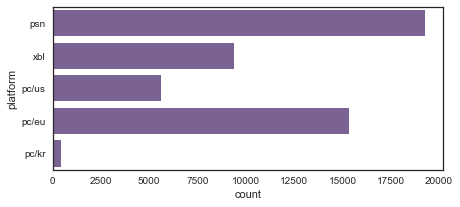

In [227]:
f, ax = plt.subplots(figsize = (7, 3))
sns.countplot(y = 'platform', data = wm, color = '#7A5A9A')

Sadly enough we have almost no data on South Korean PC platform. It makes sense to drop it for further analysis.

In [228]:
wm.drop(wm[wm.platform == 'pc/kr'].index, 
        inplace = True)

### ECDF: empirical cumulative distribution function 

Why is the Empirical Cumulative Distribution useful in Exploratory Data Analysis?

- it approximates the true CDF well if the sample size (the number of data) is large and knowing the distribution is helpful for statistical inference 
- it can visually display “how fast” the ECDF increases to 1.0
- plotting key quantiles like the quartiles is useful to get a feel for the data

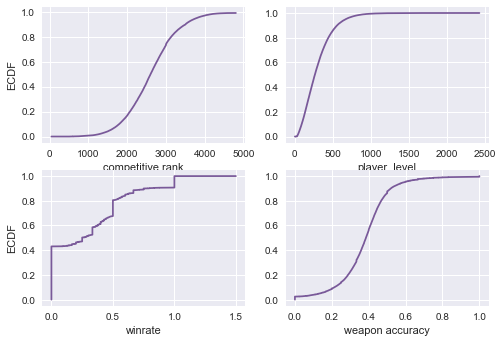

In [229]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set()# to format into seaborn 
plt.figure # for subplots

plt.subplot(221)
cdf = ECDF(wm['competitive_rank'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('competitive rank'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(222)
cdf = ECDF(wm['player_level'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('player_level');

# plot third ECDF  
plt.subplot(223)
cdf = ECDF(wm['winrate'].dropna()) # to achieve 100%
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('winrate'); plt.ylabel('ECDF');

# plot third ECDF  
plt.subplot(224)
cdf = ECDF(wm['weapon_accuracy'].dropna())
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('weapon accuracy');

Short summary of the plots above. Read from top left to bottom right:
1. The 80% of the ranks are less than 3000 and almost all competitive ranks are between 1000 and 4000.
2. About 90% of players have levels lower than 500
3. For about 40% of players the winrate is equal to zero and for 90% - less than 1.0
4. More than a half of players (60%) have less than 0.4 weapon accuracy.

### "Out-of-box" EDA solution 

Gathering descriptive statistics can be a tedious process. Gladly, there are libraries that exist that perform all of the data crunching like pandas-profiling. 
That library offers out-of-the-box statistical profiling of the dataset. Since the data we use is tidy and standardized, we can use the library right away.

In [256]:
# import pandas_profiling as pp
# pp.ProfileReport(wm)

A half of the variables are higly correlated so the ProfileReport proposes to reject those for further data analysis. We'll look at them closely in the Correlational Analysis.

<br>

## II. Gone Missing 

We've seen that we miss quite a lot of data. So what's missing data? 

It's the data that we know exists, but which, due to sparse or incomplete data collection, has no actual value. However for most case there arevariables which don't carry any informational content at all defining the non-data term. This means that when answering the question "is this data entry filled?" one must actually consider three possible answers: "Yes", "No, but it can be", and "No, and it cannot be".

There are two types of missing data: the one that occurs at random - nullity pattern - and not at random. In the first case of having a sufficiently large number of observations we can safely drop these observations using pd.DataFrame.drop().

Far more troubling, when data not missing at random, dropping the data and modeling what's left would result in falsehoods, as we will ignore a potentially important information.

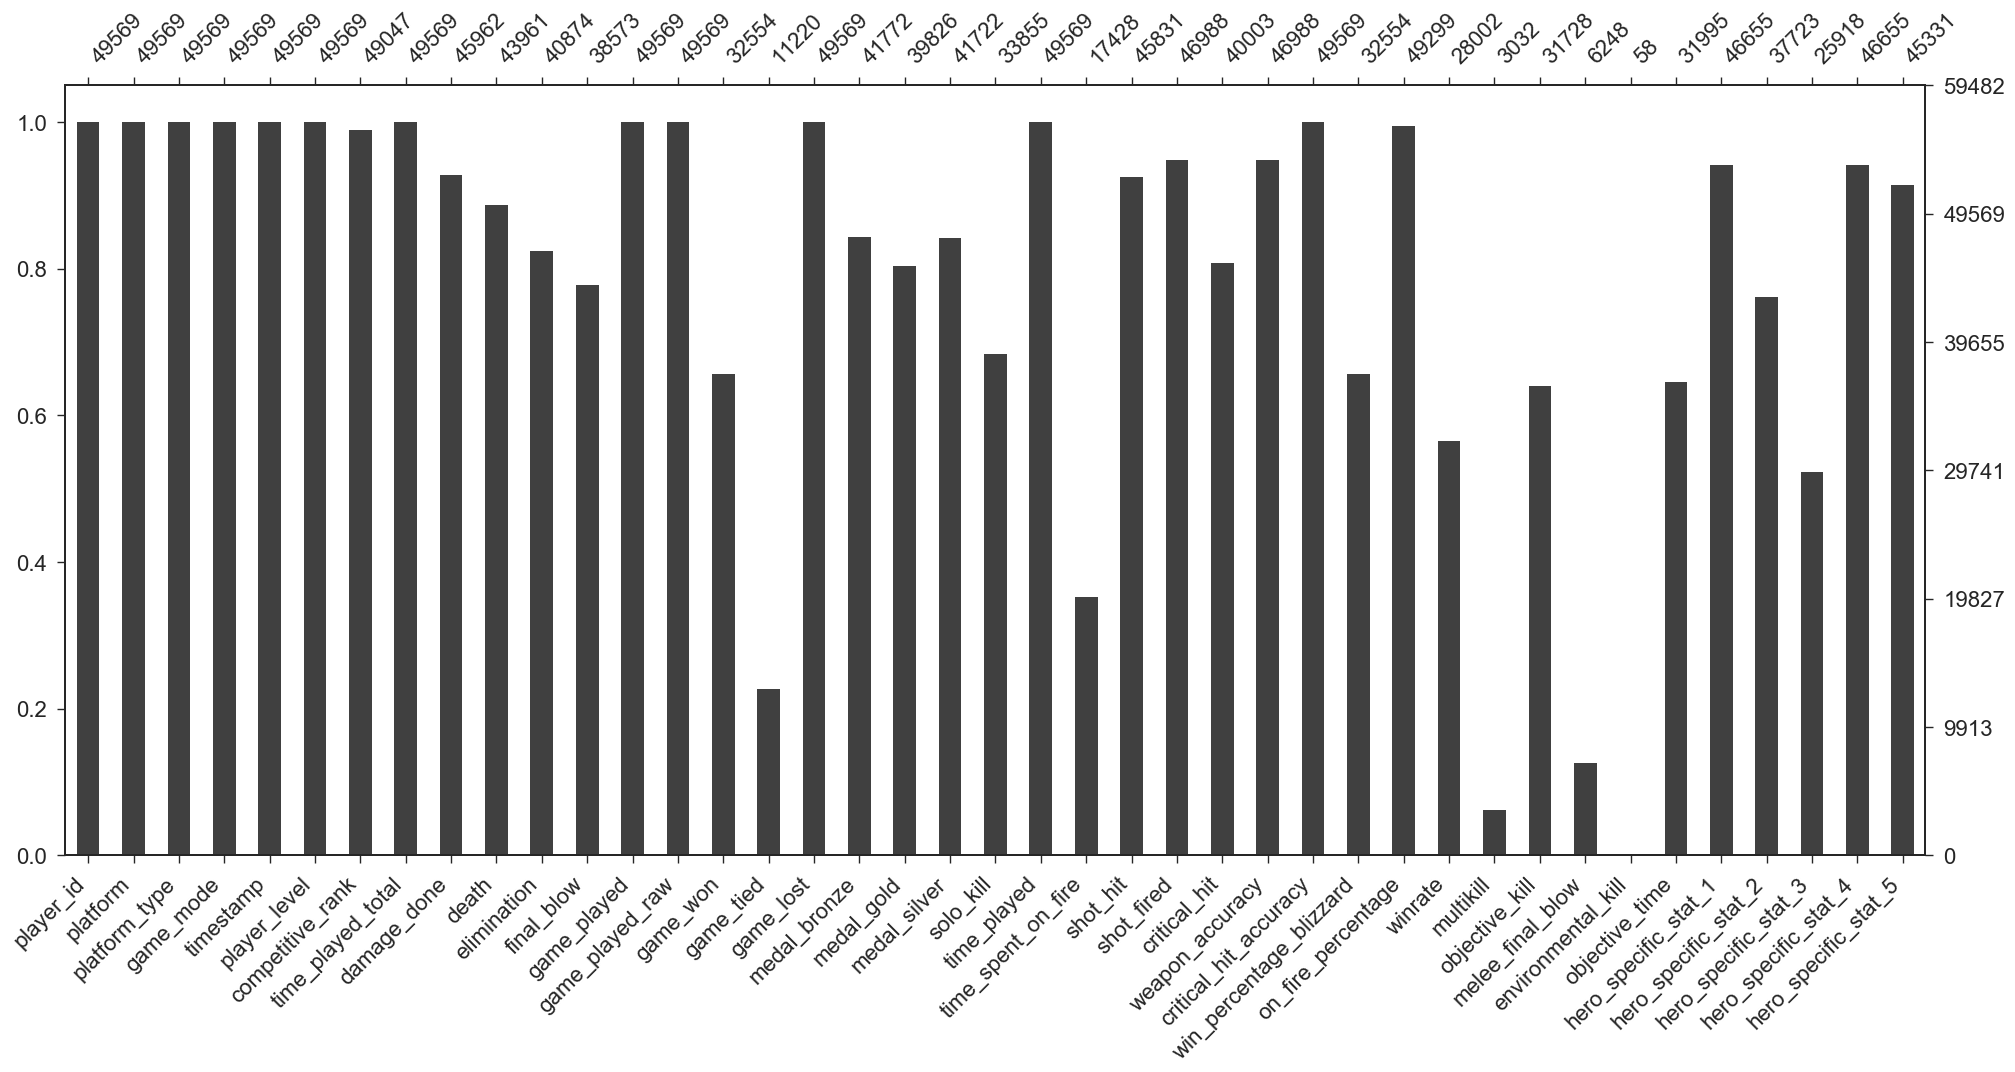

In [231]:
sns.set(style = "ticks")
msno.bar(wm)

In this specific case most of the missing values could be considered as 'no available information' - non data - and thus dropped. However there are a few variables that should have data like cometitive_rank or damage_done. At least zeros in both cases. 

In [233]:
# na's in competitive rank
wm[np.isnan(wm['competitive_rank'])].head(5)

,player_id,platform,platform_type,game_mode,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
24,ff9ab65717d8bd4c7a185281698d0588,xbl,console,competitive_play,1493284955,160,NaN,104400.0,2358.0,8.0,...,1.0,3.0,NaN,NaN,29.0,0.257143,1.0,7.0,35.0,9.0
287,b65c5864821f2003321839b233bc6398,pc/us,pc,competitive_play,1493284860,604,NaN,3060.0,2538.0,3.0,...,NaN,1.0,NaN,NaN,1.0,0.607143,3.0,NaN,28.0,17.0
485,8ebe283cb0bd3364ba0dbf70a09f625e,pc/us,pc,competitive_play,1493284777,196,NaN,50400.0,4421.0,5.0,...,NaN,1.0,NaN,NaN,NaN,0.344828,11.0,NaN,87.0,30.0
788,f83c2014cc263fd7c98131e7329296db,psn,console,competitive_play,1493284543,56,NaN,1380.0,178.0,1.0,...,NaN,NaN,NaN,NaN,4.0,0.333333,NaN,NaN,6.0,2.0
814,909a72bb8b2e201f7e8c678e294da579,pc/us,pc,competitive_play,1493284501,200,NaN,7200.0,3864.0,16.0,...,NaN,2.0,NaN,NaN,5.0,0.258503,NaN,1.0,147.0,38.0


In [235]:
# na's in competitive rank
wm[np.isnan(wm['damage_done'])].head(5)

,player_id,platform,platform_type,game_mode,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
2,947158d783411cd48c131fdee4e44e22,psn,console,competitive_play,1493285103,214,2156.0,32400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6557cc23fc5f6680424886e078034e22,pc/us,pc,competitive_play,1493285077,254,1830.0,36000.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
9,bd83d285f3804eea287673096d05ce76,psn,console,competitive_play,1493285001,490,2410.0,295200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,00a834229821959a9f21c342402f3c4d,psn,console,competitive_play,1493284998,105,2007.0,64800.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,b9acb29111d35d6c2cbee970cf718eb6,psn,console,competitive_play,1493284944,202,2467.0,32400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For some unknown reasons some playes were not attributed neither a rank nor the volume of done damage even though their total played game is not null. We can check by the use of dendrogram if the variable completion is correlated to any other variables and possibly reveal unseen trends:

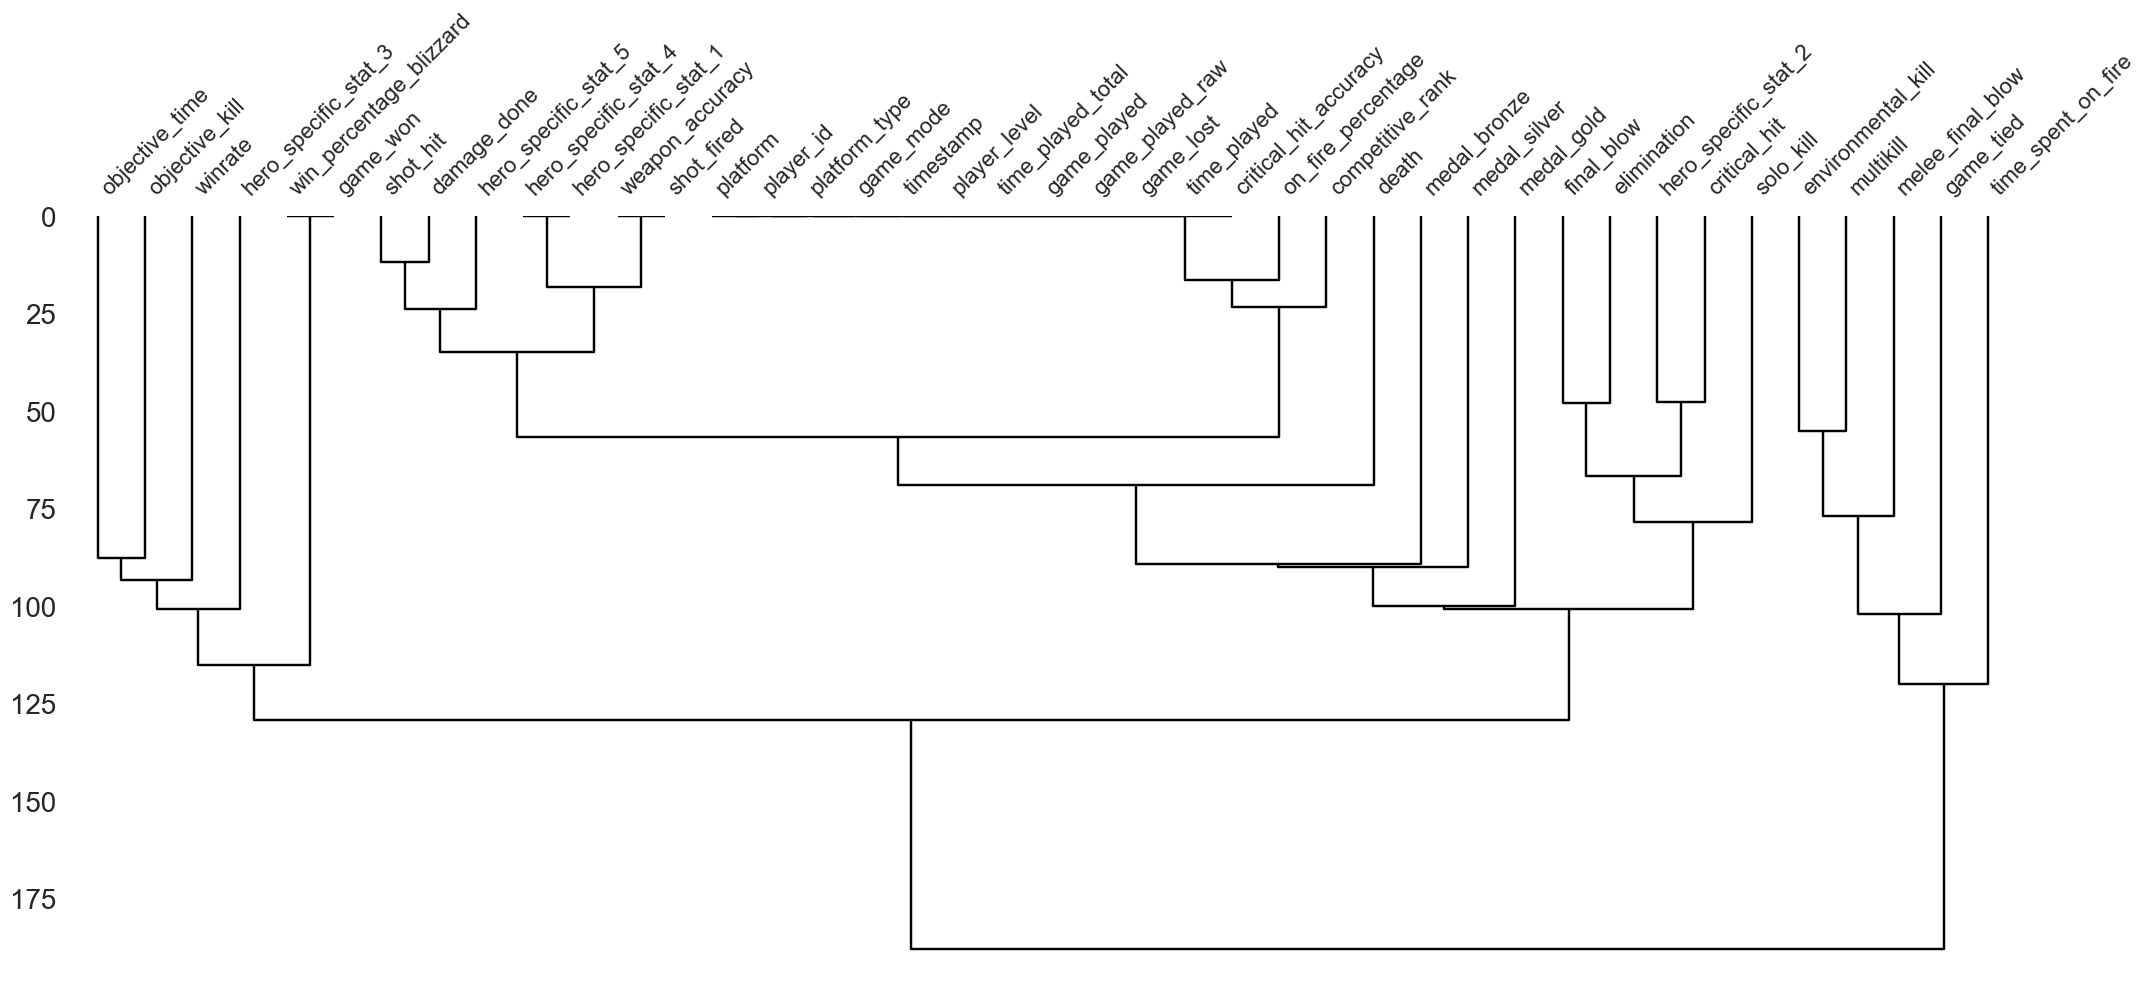

In [236]:
msno.dendrogram(wm)

To interpret this graph we read from a top-down perspective. Cluster leaves which linked together predict one another's presence — one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. 

By looking at the competitive rank, its completion depends on the on_fire_percentage paired with critical_hit_accuracy and variables (in the middle) like platform, platform_type, player_id, time_played_raw and so on, which also predict availability of each other. 

In [237]:
# na's in competitive rank for on_fire_percentage and critical_hit_accuracy
_ = wm.loc[:, ['competitive_rank', 'on_fire_percentage', 'critical_hit_accuracy', 'time_played', 'time_played_raw']]
_[np.isnan(wm['competitive_rank'])].head(5)

,competitive_rank,on_fire_percentage,critical_hit_accuracy,time_played,time_played_raw
24,NaN,0.000000,0.011236,420.000000,NaN
287,NaN,0.000000,0.136364,120.000000,NaN
485,NaN,0.027778,0.233333,360.000000,NaN
788,NaN,0.000000,0.000000,52.282848,NaN
814,NaN,0.000000,0.042105,960.000000,NaN


Indee for almost zero on_fire_percentage and with no information of time_played_raw there is no data on the competitive rank of a player.

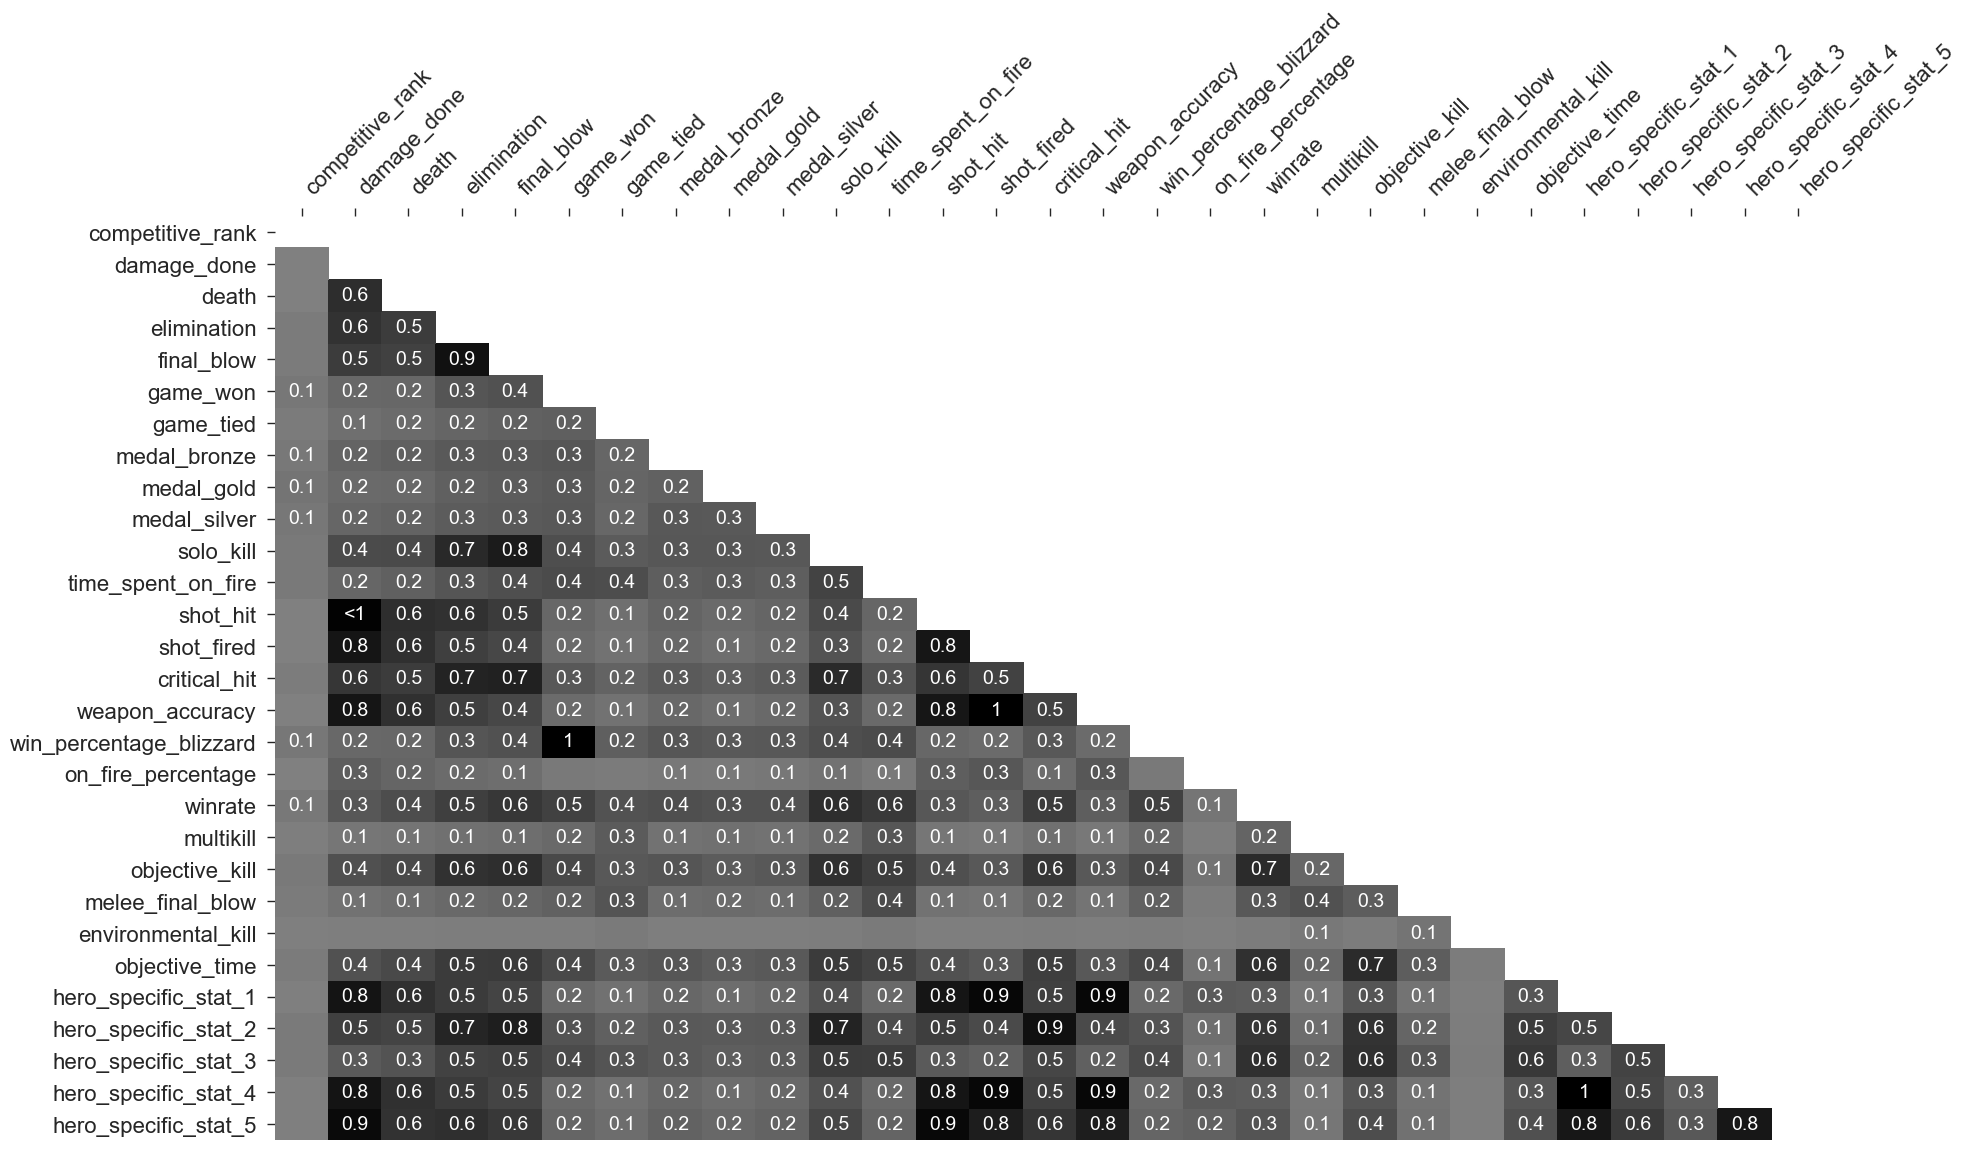

In [238]:
# nullity pattern
msno.heatmap(wm, cmap = 'binary') 

We see here as well as obvious correlations, such as if there's a game_won than win_percentage_blizzard is also present, and less obvious ones. The later is high correlaions between hero_specific_stat_5, hero_specific_stat_4, hero_specific_stat_1 and damage_done, which reveal the usage of most frequent skills.

<br>

## III. Correlation and Regression Analysis

#####  Questions to answer: 
- What are the overall variable correlations? How strong they are?
- Do the relationships between variables, specifically player's competitive rank / level / total time played and the number of game played differ from a platform to another? 
- Which variables contribute the most to the competitive rank of a player? 

Let's start with the correlations heatmap:

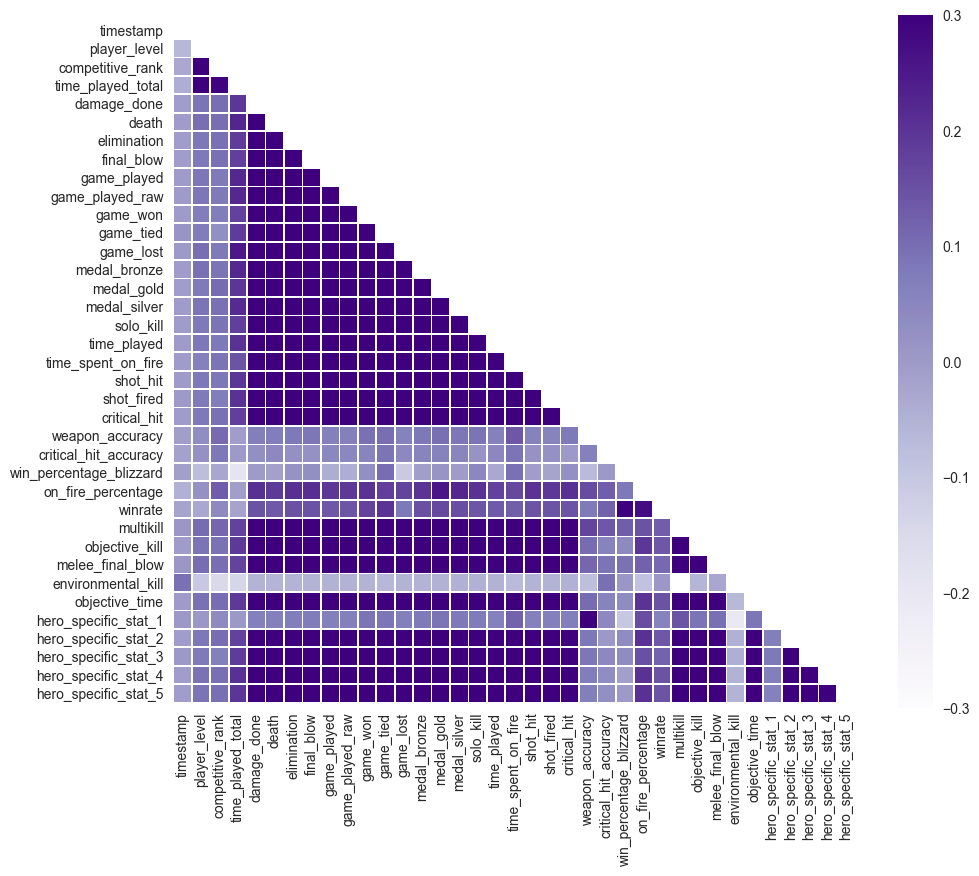

In [239]:
sns.set(style="white")

# Compute the correlation matrix
corr = wm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, vmax = .3,
            square = True, linewidths = .5, ax = ax, cmap = "Purples")           
plt.show()

As we could have seen that before at the python_profiling's report, we have a lot of highly linearly correlated variables, expecially:

- critical_hit and shot_fired (ρ = 0.95684)
- death and damage_done (ρ = 0.96858) 
- elimination and death (ρ = 0.96289) 
- final_blow and elimination (ρ = 0.9978) 
- game_lost and game_played_raw (ρ = 0.96982) 
- game_played and final_blow (ρ = 0.9719) 
- game_played_raw and game_played (ρ = 0.99975) 
- game_won and game_played_raw (ρ = 0.97169)
- hero_specific_stat_2 and objective_kill (ρ = 0.96798) 
- hero_specific_stat_5 and hero_specific_stat_4 (ρ = 0.99688) 
- medal_bronze and game_lost (ρ = 0.94503) 
- medal_gold and medal_bronze (ρ = 0.91806) 
- medal_silver and medal_gold (ρ = 0.95077) 
- objective_kill and critical_hit (ρ = 0.97923) 
- shot_fired and with shot_hit (ρ = 0.99264) 
- shot_hit and time_played (ρ = 0.97938) 
- solo_kill and medal_silver (ρ = 0.96058)
- time_played and solo_kill (ρ = 0.97128) 
- time_spent_on_fire and solo_kill (ρ = 0.95738) 

In some cases, it would indeed make sense to drop certain variables, like game_played_raw which is higly correlated to both game_played and game_won; or shot_hit which is paired to both shot_fired and time_played. 

Another efficient way of plotting relationships between variables is a pairplot. Here below we are interested to know how the main metrics, such as competitive rank and player level, are related to each other:

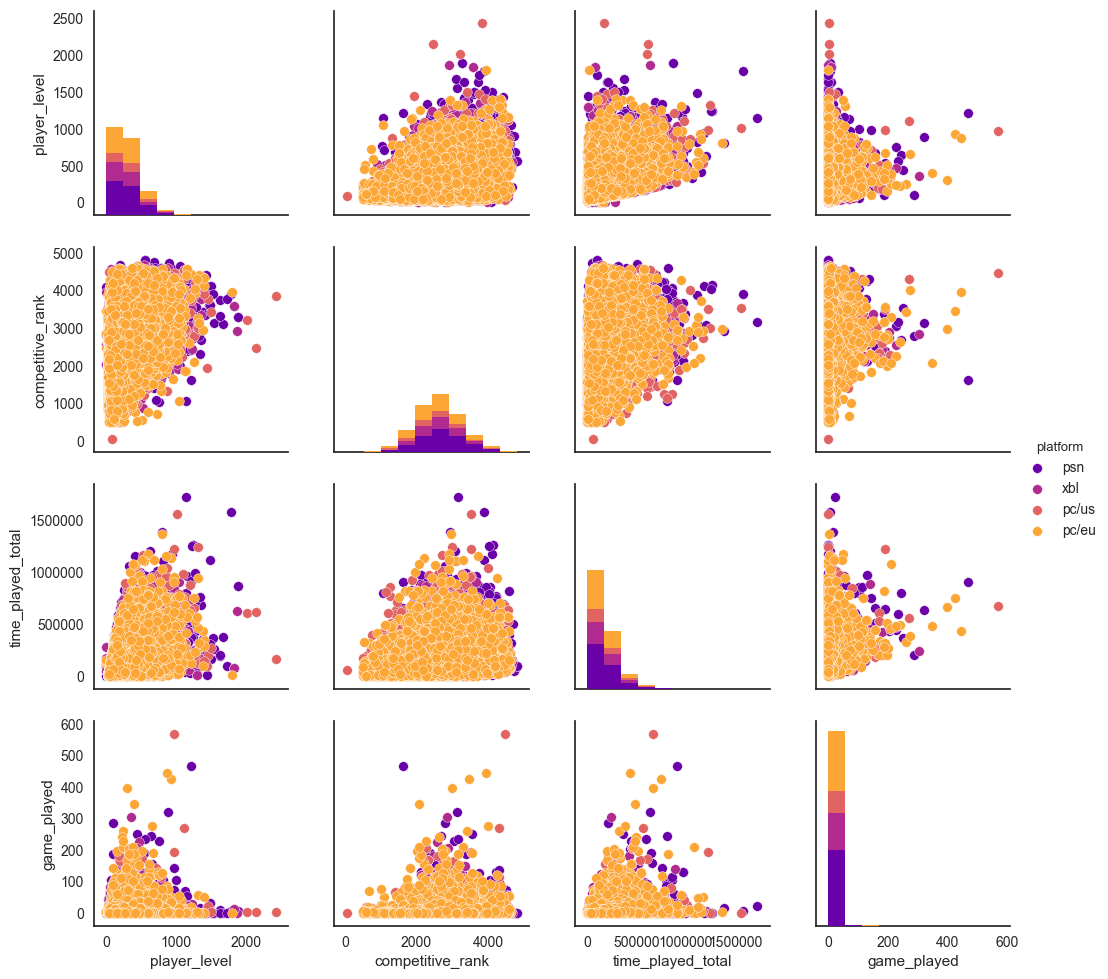

In [241]:
# general = ['player_level', 'platform', 'competitive_rank', 'time_played_total', 'game_played']
sns.pairplot(wm.loc[:, general].dropna(), 
             hue = 'platform', # colored by platforms
             palette = 'plasma')

As we see saw at the correlation heatmap, there are few strong correlations between competitive_rank / player_level and time_played_total, though their relationship is not linear. 

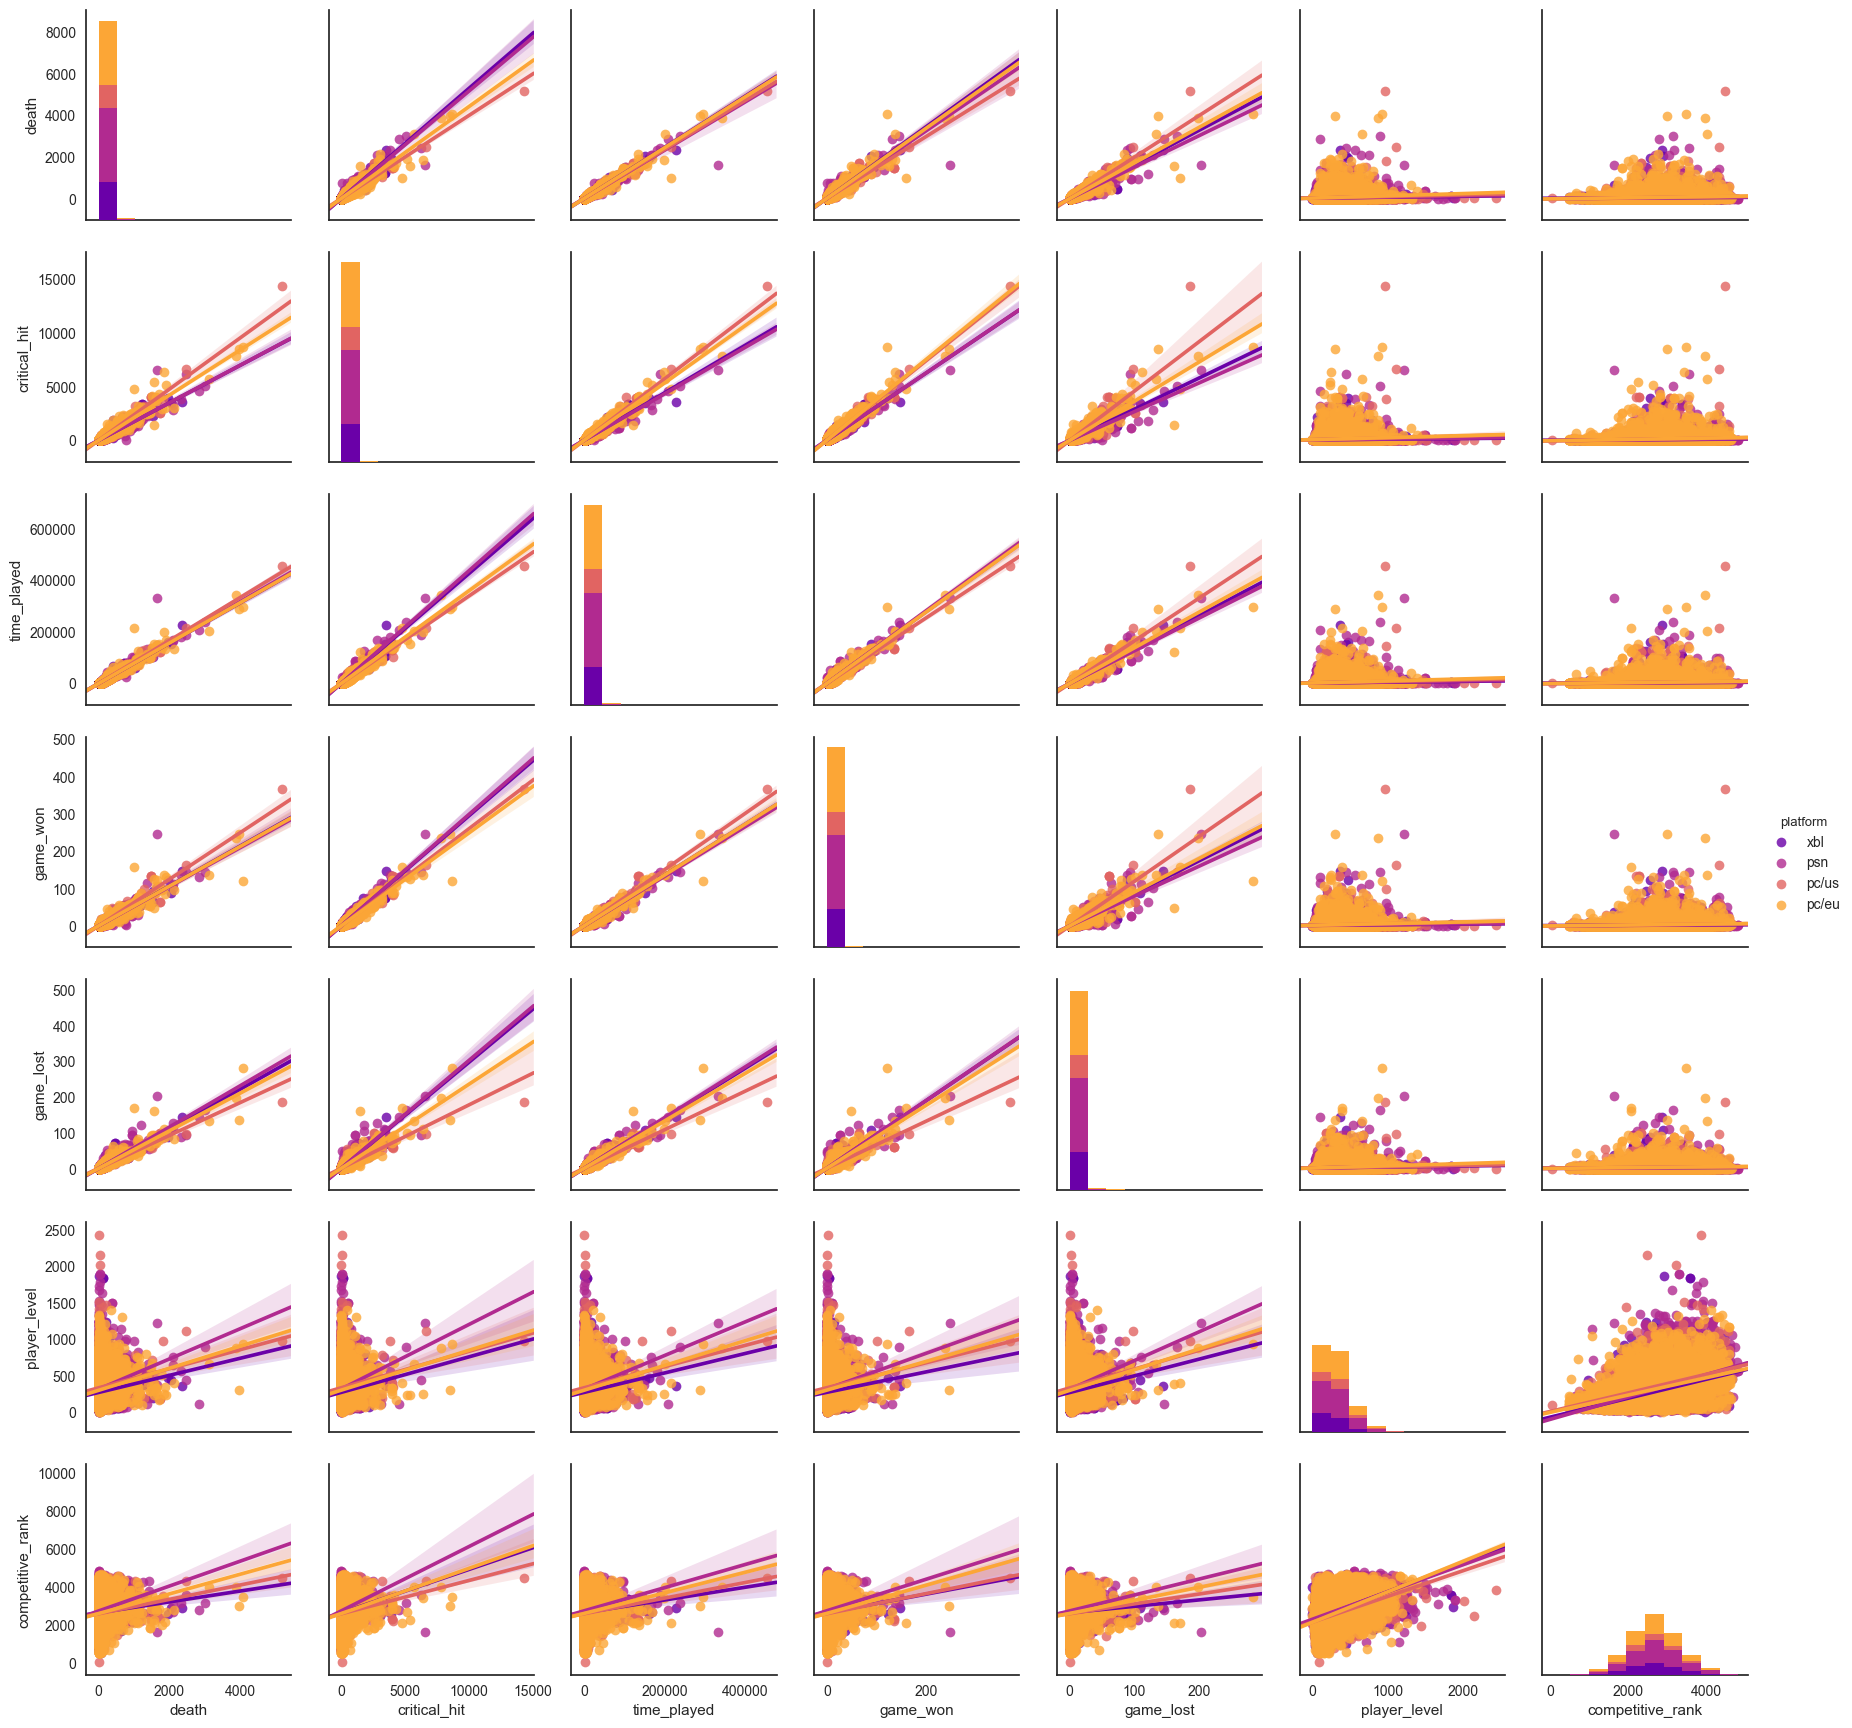

In [244]:
action = ['death', 'critical_hit', 'time_played', 'game_won', 'game_lost']
sns.pairplot(wm.loc[:, action + ['platform', 'player_level', 'competitive_rank']].dropna(), 
             kind = 'reg', # to draw regression lines
             hue = 'platform', # colored by platforms to reveal trends
             palette = 'plasma')

There are few strong positive linear correlations on the graphs above:
- death and critical hit, it seems that with an increase in number of player's deaths there is a proportional increase in the number of critical hits
- critical hit is also linearly related to time_played in a session and game_won variables
- niether player_level nor competitive_rank do not seem to have clear linear relationship to other variables

Let's have a look at the hero specific stats and how they are correlated to each other and damage_done variable: 

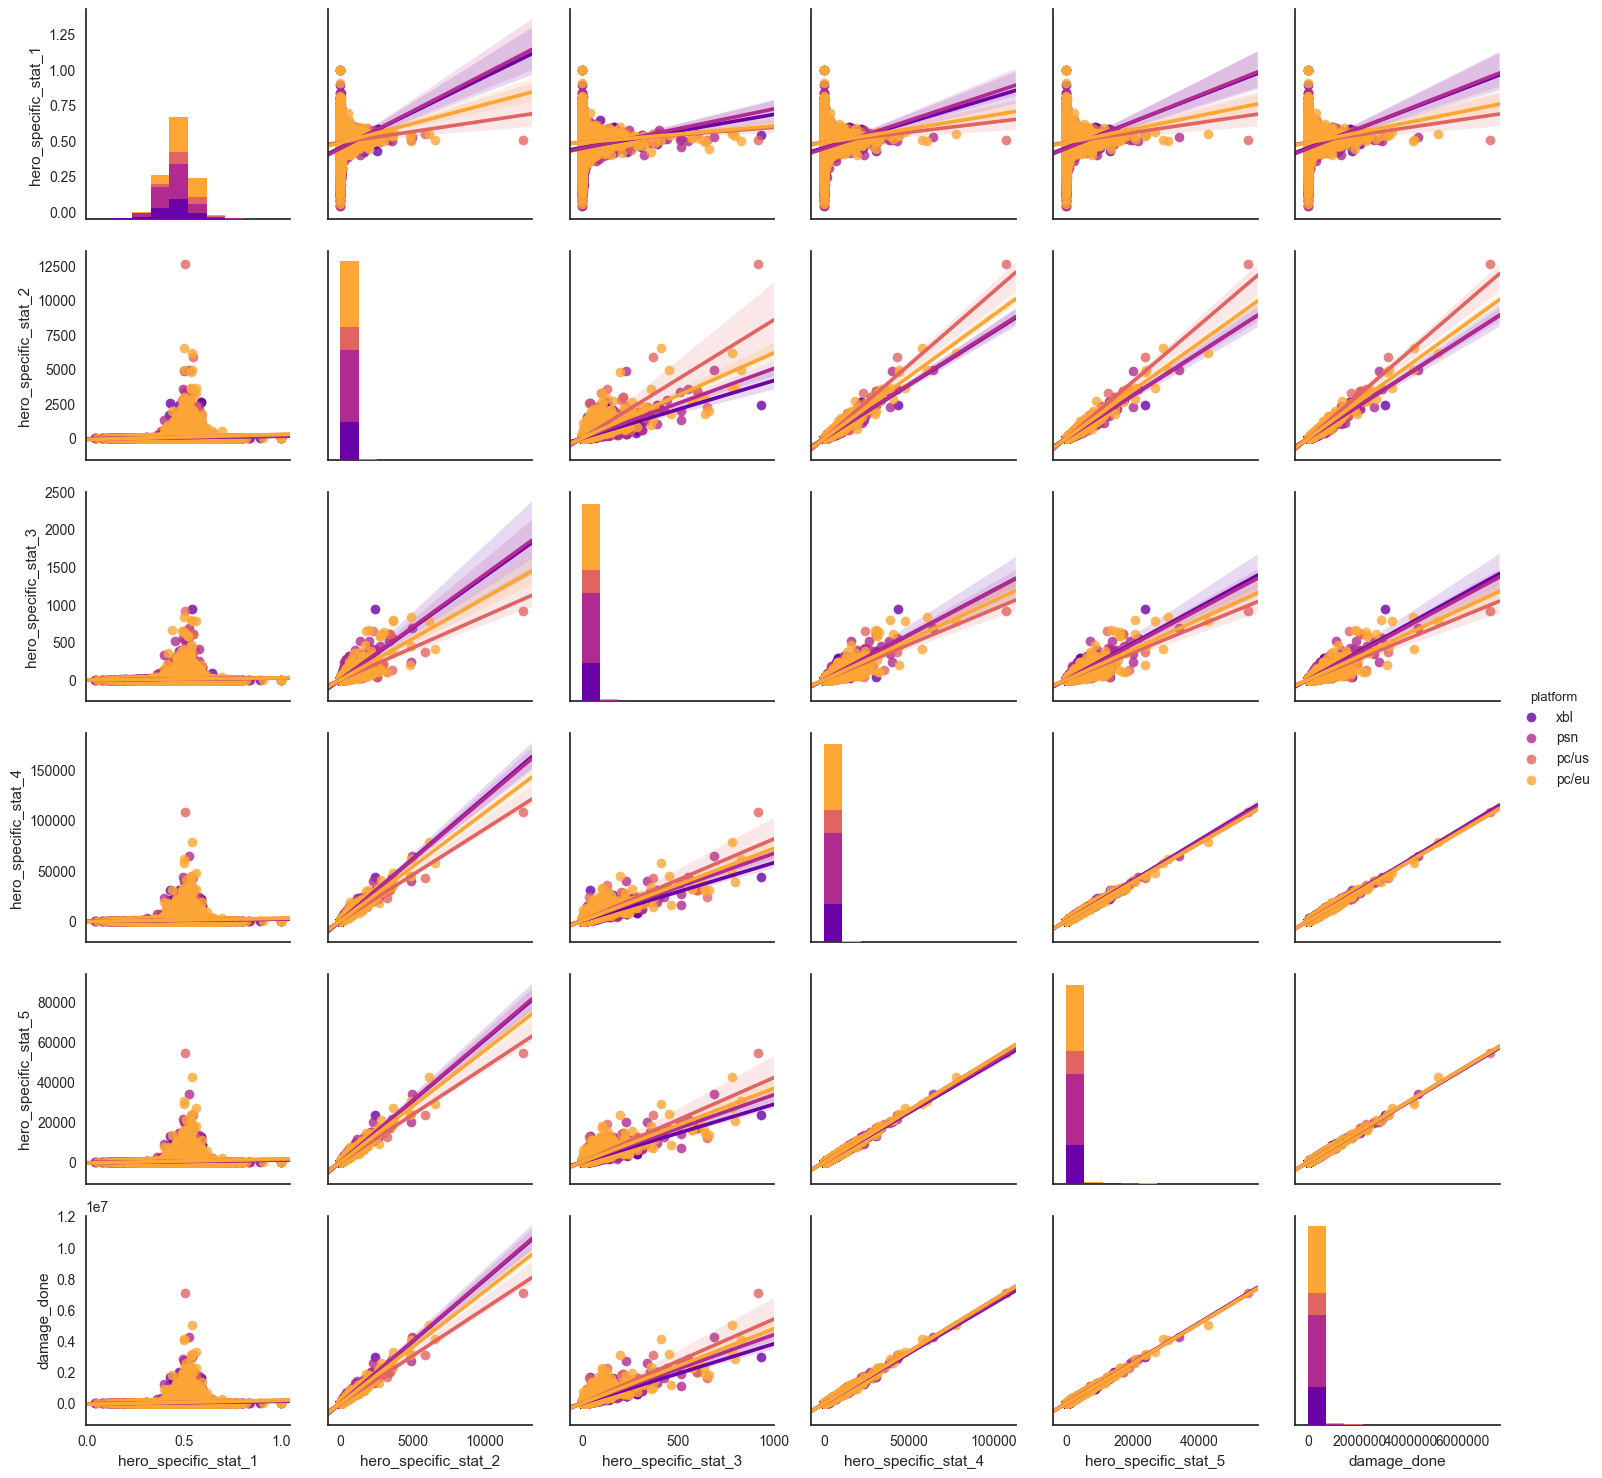

In [245]:
hero = ['hero_specific_stat_1', 'hero_specific_stat_2', 'hero_specific_stat_3',
       'hero_specific_stat_4', 'hero_specific_stat_5']
sns.pairplot(wm.loc[:, hero + ['platform', 'damage_done']].dropna(), 
             kind = 'reg',
             hue = 'platform',
             palette = 'plasma')

Here is a quick reminder of widowmaker's specific skills and stats:
- hero_specific_stat_1 = scoped_accuracy
- hero_specific_stat_2 = scoped_critical_hit
- hero_specific_stat_3 = venom_mine_kill
- hero_specific_stat_4 = scoped_shot
- hero_specific_stat_5 = scoped_hit

A set of stats, scoped_shot (hss4) and scoped_hit (hhs5) are both in strong positive linear relationship with damage_done variable and with each other. We can suggest that these both skills cause more damage, but this will be only a suggestion - a separate (causal) analysis should be held to proove it.

Let's now take a closer look at one of the very few categorical variables in the dataset: platform. It would be interesting to see how the averages of main metrics like player level, competitive rank etc, differ from a platform to another.

In [246]:
wm.loc[:, general].groupby('platform').mean()

,player_level,competitive_rank,time_played_total,game_played
platform,,,,
pc/eu,297.383913,2538.905320,158087.635201,4.204514
pc/us,328.103152,2506.651907,183055.852436,3.635387
psn,310.571273,2691.972504,178647.917393,2.756416
xbl,268.696789,2596.736192,168844.171805,2.899001


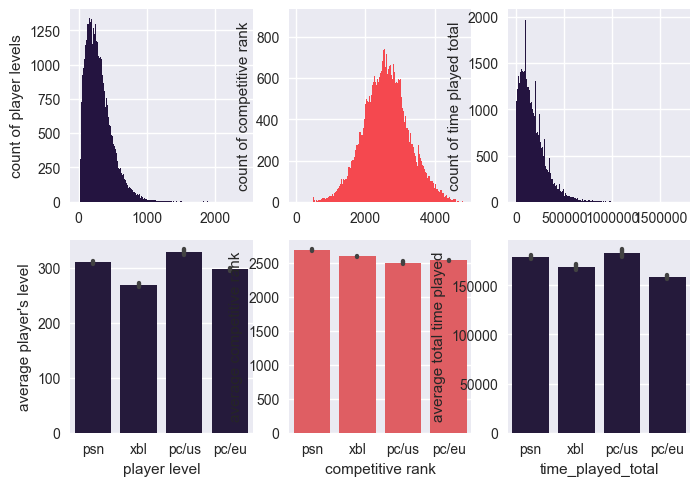

In [247]:
"""The same information but visually + distribution of each variable (excluding winrate)"""

sns.set() # to format into seaborn 
plt.figure # for subplots

# distribution plots
plt.subplot(231)
plt.hist(wm['player_level'], 
         bins = int(np.sqrt(len(wm['player_level']))), # n of bins = square root of number of obs.
         color = '#241440'); 
plt.ylabel('count of player levels');

plt.subplot(232)
plt.hist(wm['competitive_rank'].dropna(), 
         bins = int(np.sqrt(len(wm['competitive_rank']))), 
         color = "#F5484F"); 
plt.ylabel('count of competitive rank');

plt.subplot(233)
plt.hist(wm['time_played_total'], 
         bins = int(np.sqrt(len(wm['time_played_total']))), 
         color = '#241440'); 
plt.ylabel('count of time played total');

# average bar plots
plt.subplot(234)
sns.barplot(x = 'platform', y = 'player_level', data = wm,
           color = '#241440')
plt.xlabel('player level'); plt.ylabel("average player's level")
plt.subplot(235)
sns.barplot(x = 'platform', y = 'competitive_rank', data = wm,
           color = "#F5484F")
plt.xlabel('competitive rank'); plt.ylabel('average competitive rank');

plt.subplot(2,3,6)
sns.barplot(x = 'platform', y = 'time_played_total', data = wm,
           color = '#241440')
plt.xlabel('time_played_total'); plt.ylabel('average total time played');


Players using PC on the US server have the highest average level and total time played. However, those who play on playstation have the highest average competitive rank. 

### ANOVA: Analysis of Variances 

The analysis of variance or ANOVA is a statistical inference test that lets us compare multiple groups at the same time. By its use we can check whether a numeric response (__player level, competitive rank, time_played_total and winrate__) variable varies according to the levels of a categorical variable (__platform__). We exclude South Korean platform due to the lack of sufficient amount of data.

In [248]:
# dropping pc/kr
wm.drop(wm[wm.platform == 'pc/kr'].index, 
        inplace = True)

pll_wm = wm.loc[:, 'player_level']
pc_eu1 = pll_wm[wm.platform == 'pc/eu']
pc_us1 = pll_wm[wm.platform == 'pc/us']
psn1 = pll_wm[wm.platform == 'psn']
xbl1 = pll_wm[wm.platform == 'xbl']

stats.f_oneway(pc_eu1, pc_us1, psn1, xbl1)  

F_onewayResult(statistic=140.35235971030778, pvalue=1.4726396634220742e-90)

In [249]:
cpr_wm = wm.loc[:, 'competitive_rank'].dropna()

pc_eu2 = cpr_wm[wm.platform == 'pc/eu']
pc_us2 = cpr_wm[wm.platform == 'pc/us']
psn2 = cpr_wm[wm.platform == 'psn']
xbl2 = cpr_wm[wm.platform == 'xbl']

stats.f_oneway(pc_eu2, pc_us2, psn2, xbl2) 

F_onewayResult(statistic=212.68140549680393, pvalue=4.4281173583373529e-137)

In [250]:
tpt_wm = wm.loc[:, 'time_played_total']

pc_eu3 = tpt_wm[wm.platform == 'pc/eu']
pc_us3 = tpt_wm[wm.platform == 'pc/us']
psn3 = tpt_wm[wm.platform == 'psn']
xbl3 = tpt_wm[wm.platform == 'xbl']

stats.f_oneway(pc_eu3, pc_us3, psn3, xbl3)  

F_onewayResult(statistic=80.714982255657745, pvalue=4.3815177549829509e-52)

In [251]:
wr_wm = wm.loc[:, 'winrate'].dropna()

pc_eu4 = wr_wm[wm.platform == 'pc/eu']
pc_us4 = wr_wm[wm.platform == 'pc/us']
psn4 = wr_wm[wm.platform == 'psn']
xbl4 = wr_wm[wm.platform == 'xbl']

stats.f_oneway(pc_eu4, pc_us4, psn4, xbl4)  

F_onewayResult(statistic=67.639980601819758, pvalue=1.417673309102044e-43)

All four tests results suggest that the groups don't have the same sample means, since the p-value is significant at a 99% confidence level. To check which groups differ after getting a positive ANOVA result, we can perform one of the most common follow up test ("post-hoc test") - Tukey's test.

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,30.7192,22.9232,38.5153,True
pc/eu,psn,13.1874,7.7882,18.5866,True
pc/eu,xbl,-28.6871,-35.2198,-22.1544,True
pc/us,psn,-17.5319,-25.1129,-9.9508,True
pc/us,xbl,-59.4064,-67.8323,-50.9804,True
psn,xbl,-41.8745,-48.1491,-35.5999,True


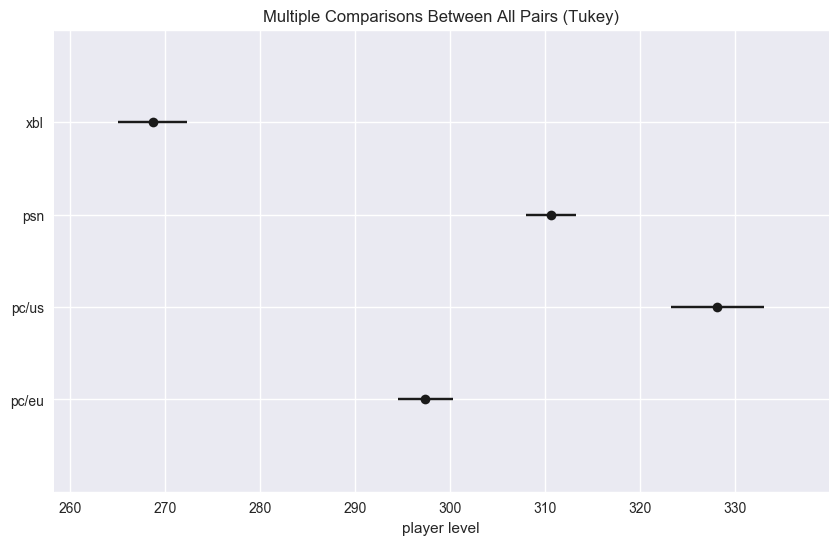

In [252]:
tukey = pairwise_tukeyhsd(endog = pll_wm, # player levels
                          groups = wm.platform,   
                          alpha = 0.05) # 95% CI       

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('player level')
# See test summary
tukey.summary()              

The output of the Tukey test shows the average difference, a confidence interval as well as whether we should retain/reject the null hypothesis for each pair of platforms at the given significance level. 

In the first case (player level), the test suggest to reject the null hypothesis for every pair. Which means that __almost every platform is likely different from the others__ (in tems of player levels) and the 95% confidence interval plot reinforces the results visually: not a single pair of confidence intervals are overlaping.

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,-32.2534,-58.2484,-6.2584,True
pc/eu,psn,153.0672,135.0554,171.079,True
pc/eu,xbl,57.8309,36.0321,79.6297,True
pc/us,psn,185.3206,160.0621,210.5791,True
pc/us,xbl,90.0843,61.9995,118.1691,True
psn,xbl,-95.2363,-116.1514,-74.3212,True


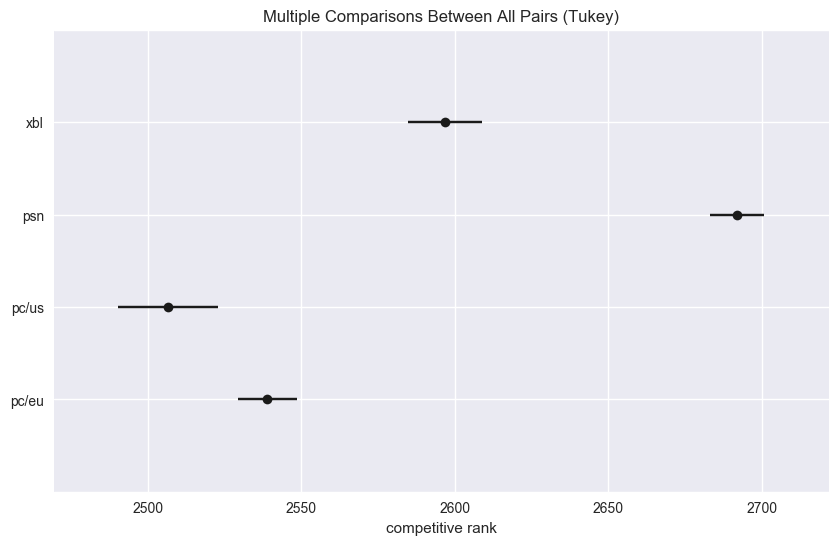

In [253]:
tukey = pairwise_tukeyhsd(endog = cpr_wm, # competitive rank
                          groups = wm['platform'][wm.competitive_rank.notnull()], # drop null
                          alpha = 0.05) # 95% CI         

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('competitive rank')

# See test summary
tukey.summary()          

The same results go for the competitive rank: the test suggests that we reject the null hypothesis every pair. 

Notice that users of Xbox, for both player_level and competitive_rank, have 'outstand' the most.

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,24968.2172,19471.5905,30464.844,True
pc/eu,psn,20560.2822,16753.5561,24367.0083,True
pc/eu,xbl,10756.5366,6150.6393,15362.4339,True
pc/us,psn,-4407.935,-9752.9997,937.1296,False
pc/us,xbl,-14211.6806,-20152.4586,-8270.9027,True
psn,xbl,-9803.7456,-14227.6693,-5379.8219,True


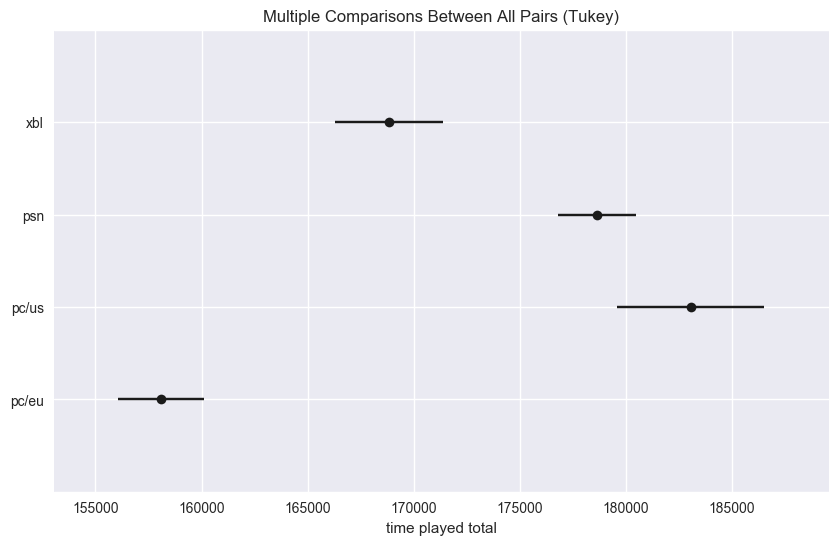

In [254]:
tukey = pairwise_tukeyhsd(endog = tpt_wm, # time played total
                          groups = wm.platform,   
                          alpha = 0.05) # 95% CI       

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('time played total')
# See test summary
tukey.summary()              

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,0.0153,-0.0018,0.0323,False
pc/eu,psn,-0.0555,-0.0674,-0.0436,True
pc/eu,xbl,-0.0351,-0.0494,-0.0209,True
pc/us,psn,-0.0708,-0.0876,-0.054,True
pc/us,xbl,-0.0504,-0.0689,-0.0319,True
psn,xbl,0.0204,0.0065,0.0343,True


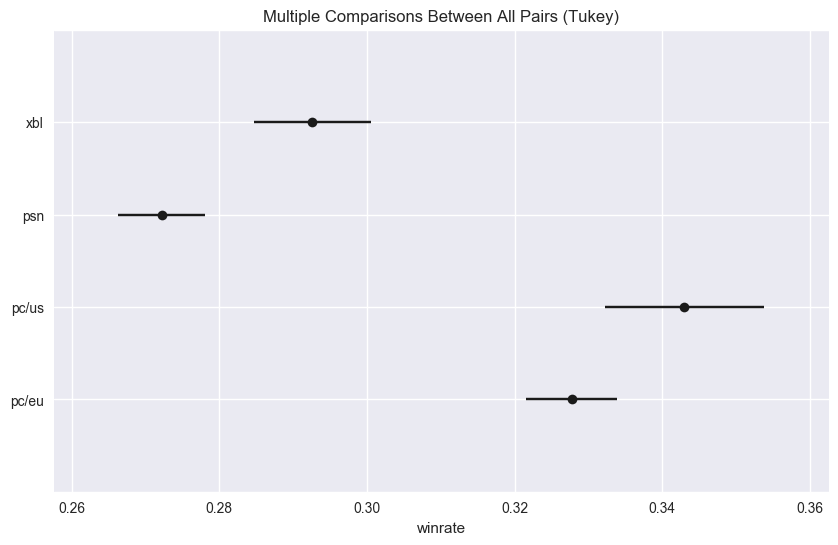

In [255]:
tukey = pairwise_tukeyhsd(endog = wr_wm, # winrate
                          groups = wm['platform'][wm.winrate.notnull()], # drop null   
                          alpha = 0.05) # 95% CI       

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('winrate')
# See test summary
tukey.summary()         

Looking at all of the plots above we can definetly say that every platform in terms of player's competitive rank, level, total time played and winrate is different, eventhough they might show more or less the same sample means. It makes sense to treat the platforms separetly in order to reveal certain trends on variables above.

## IV. (Coming next) Causal Inference 

Causal inference is the process of drawing a conclusion about a causal connection based on the conditions of the occurrence of an effect. The main difference between causal inference and inference of association is that the former analyzes the response of the effect variable when the cause is changed. For the reason that correlations represent simple response to change effects in causes, we need to manage another analysis - causal analysis. 

#####  Questions to answer: 
- Does the number of won games positevly affect the time played by a player in a session? 
- What cause a significant change in a competitive rank of a player?

to follow in the next notebook ...